In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

#### **LOAD DATASET** ####

In [14]:
df=pd.read_csv("../data/sentiment140.csv",encoding="latin-1",header=None)
df.columns=["target","id","date","flag","user","text"]
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


#### **CLEAN LABELS** ####

In [15]:
df=df[["target","text"]]

#0-Negative , 4-Positive
df['sentiment']=df["target"].map({0:"Negative",4:"Positive"})

df.head()


,target,text,sentiment
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative
1,0,is upset that he can't update his Facebook by ...,Negative
2,0,@Kenichan I dived many times for the ball. Man...,Negative
3,0,my whole body feels itchy and like its on fire,Negative
4,0,"@nationwideclass no, it's not behaving at all....",Negative


#### **CHECK INFO** ####

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   target     1600000 non-null  int64 
 1   text       1600000 non-null  object
 2   sentiment  1600000 non-null  object
dtypes: int64(1), object(2)
memory usage: 36.6+ MB


In [17]:
df.isnull().sum()

target       0
text         0
sentiment    0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(16309)

In [19]:
df.shape

(1600000, 3)

#### **CLASS DISTRIBUTION** ####

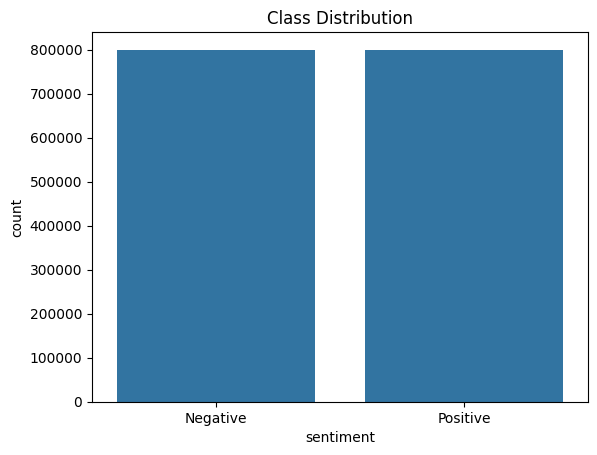

In [20]:
sn.countplot(data=df,x='sentiment')
plt.title("Class Distribution")
plt.show()

#### **TEXT LENGTH ANALYSIS** ####

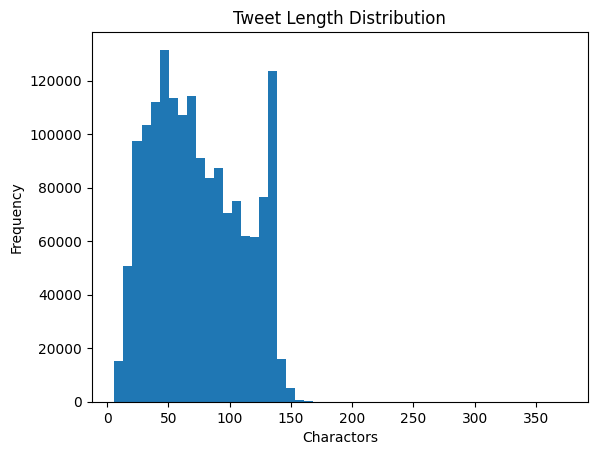

In [21]:
df["length"]=df["text"].apply(len)

plt.hist(df['length'],bins=50)
plt.title("Tweet Length Distribution")
plt.xlabel("Charactors")
plt.ylabel("Frequency")
plt.show()


#### **WORLDCLOUDS VISUALIZATION** ####

In [22]:
from wordcloud import WordCloud
import re

In [23]:
def simple_clean(text):
    text = re.sub(r"http\S+|www\.\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    return text

Positive words: 61806
Negative words: 66539


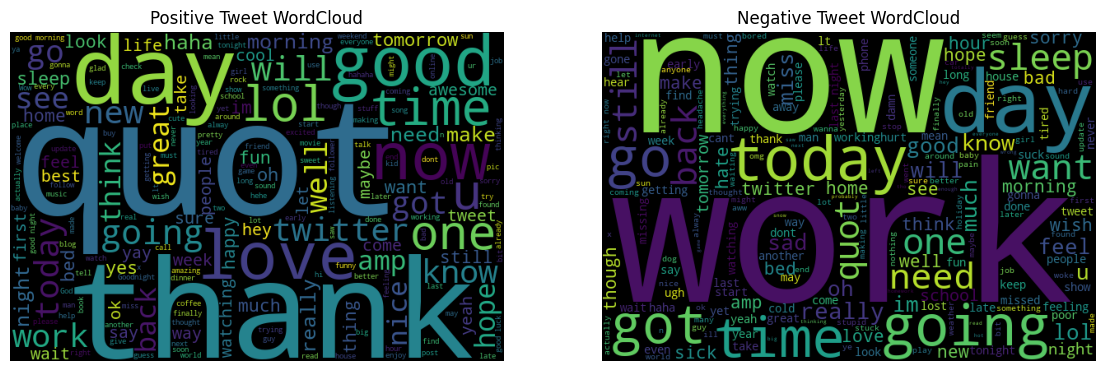

In [24]:
positive_text = " ".join(df[df.sentiment=="Positive"]['text'].apply(simple_clean).tolist()[:5000])
negative_text = " ".join(df[df.sentiment=="Negative"]['text'].apply(simple_clean).tolist()[:5000])

print("Positive words:", len(positive_text.split()))
print("Negative words:", len(negative_text.split()))


plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=600, height=400).generate(positive_text))
plt.title("Positive Tweet WordCloud")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=600, height=400).generate(negative_text))
plt.title("Negative Tweet WordCloud")
plt.axis("off")

plt.show()
